# Đặt câu hỏi, phân tích và trả lời

**Câu hỏi:** Nguồn tài liệu có là một phần quan trọng để tạo nên những bộ phim được đánh giá cao hay không?

**Lợi ích:** 
- Định hướng chiến lược sản xuất phim:
  + Các nhà sản xuất có thể xác định được Nguồn tài liệu nào phổ biến và có đánh giá cao, từ đó lựa chọn nguồn tài liệu phù hợp cho các dự án sắp tới.
  + Việc hiểu rõ các yếu tố này sẽ giúp các hãng phim đầu tư vào những Nguồn tài liệu có tiềm năng thành công, giảm thiểu rủi ro trong sản xuất phim.
- Nâng cao sự hiểu biết về các yếu tố ảnh hưởng đến đánh giá phim: Câu hỏi này sẽ giúp bạn hiểu ngoài những yếu tố khác thì liệu Nguồn tài liệu có phải là một yếu tố quan trọng ảnh hưởng đến sự thành công của một bộ phim hay không. Từ đó, có thể hình thành những hệ thống, mô hình sau này.

**Cách trả lời:**
- Xem xét điểm đánh giá trung bình của các Nguồn tài liệu để thấy được những Nguồn tài liệu có xu hướng tạo ra những bộ Anime có điểm đánh giá cao.
- Xem xét các Nguồn tài liệu phổ biến để xem mức độ phân hóa điểm của chúng như thế nào, có rõ ràng hay không và có điểm đánh giá cao hay không.
- Xem xét mối quan hệ giữa điểm đánh giá, số lượt đánh giá và số lượng phim để có cái nhìn tổng quan về các Nguồn tài liệu.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Đọc dữ liệu

In [4]:
df = pd.read_csv('./anime_preprocessing.csv')

## Xử lý

In [5]:
# Xóa toàn bộ dòng có giá trị NULL
cleaned_df = df.dropna()
print(cleaned_df.isnull().sum())  # Kiểm tra số lượng giá trị NULL còn lại
print(cleaned_df.shape)          # Kiểm tra kích thước dữ liệu sau khi làm sạch

ID            0
Title         0
Episodes      0
Type          0
Aired         0
Producers     0
Studios       0
Source        0
Genres        0
Duration      0
Score         0
Scored By     0
Rank          0
Popularity    0
dtype: int64
(13009, 14)


In [34]:
# Tính phần trăm các giá trị "Unknown" trong cột "Source"
unknown_sources_count = cleaned_df[cleaned_df['Source'] == 'UNKNOWN'].shape[0]  # Đếm số dòng có giá trị "UNKNOWN"
total_sources_count = cleaned_df.shape[0]  # Tổng số dòng
unknown_sources_percent = (unknown_sources_count / total_sources_count) * 100  # Tính phần trăm

# In kết quả
print(f"Phần trăm các giá trị 'UNKNOWN' trong cột 'Source': {unknown_sources_percent:.2f}%")

Phần trăm các giá trị 'UNKNOWN' trong cột 'Source': 7.53%


In [36]:
# Với số lượng ít hơn 10% này ta sẽ tiến hành xóa các hàng này luôn
cleaned_df = cleaned_df[cleaned_df['Source'] != 'UNKNOWN']

In [37]:
# Check kết quả
print(cleaned_df[cleaned_df['Source'] == 'UNKNOWN'].shape[0])

0


## Phân tích

### Biểu đồ 1: Xây dựng điểm đánh giá trung bình của các nguồn tài liệu

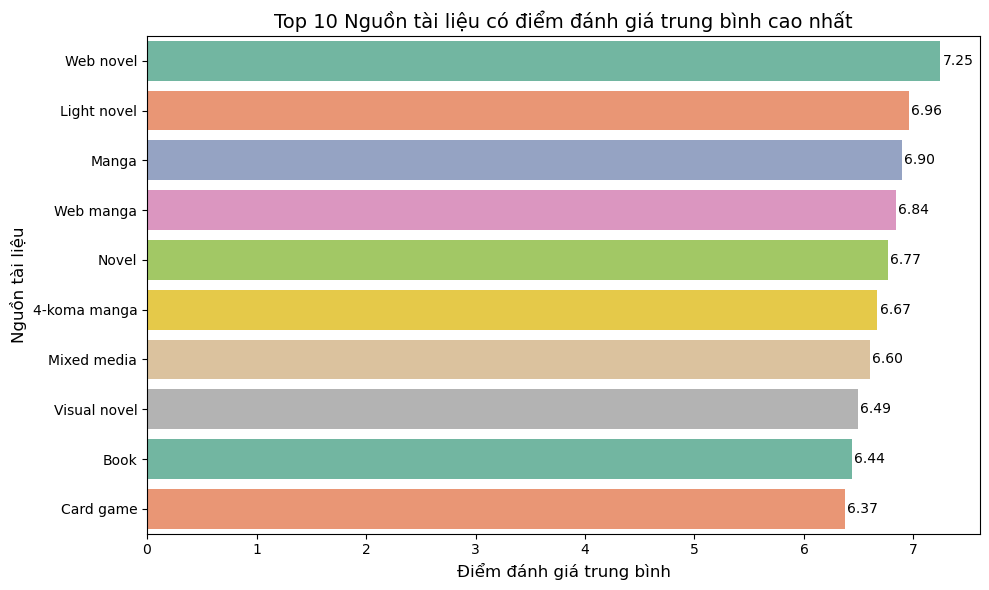

In [40]:
# Tính trung bình điểm số của từng Nguồn tài liệu (Source)
top_source = (cleaned_df.groupby('Source')['Score'].mean().sort_values(ascending=False).head(10))

# Tính trung bình điểm số của từng Nguồn tài liệu (Source)
top_source = (cleaned_df.groupby('Source')['Score'].mean().sort_values(ascending=False).head(10))

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_source.values, y=top_source.index, hue=top_source.index, palette="Set2", dodge=False)

# Thêm giá trị điểm trung bình vào các thanh
for i in range(len(top_source)):
    ax.text(top_source.values[i] + 0.02, i, f'{top_source.values[i]:.2f}', ha='left', va='center', fontsize=10)

# Tiêu đề và nhãn trục
plt.title('Top 10 Nguồn tài liệu có điểm đánh giá trung bình cao nhất', fontsize=14)
plt.xlabel('Điểm đánh giá trung bình', fontsize=12)
plt.ylabel('Nguồn tài liệu', fontsize=12)

plt.tight_layout()
plt.show()

### Biểu đồ 2: Phân phối điểm số của các nguồn tài liệu.

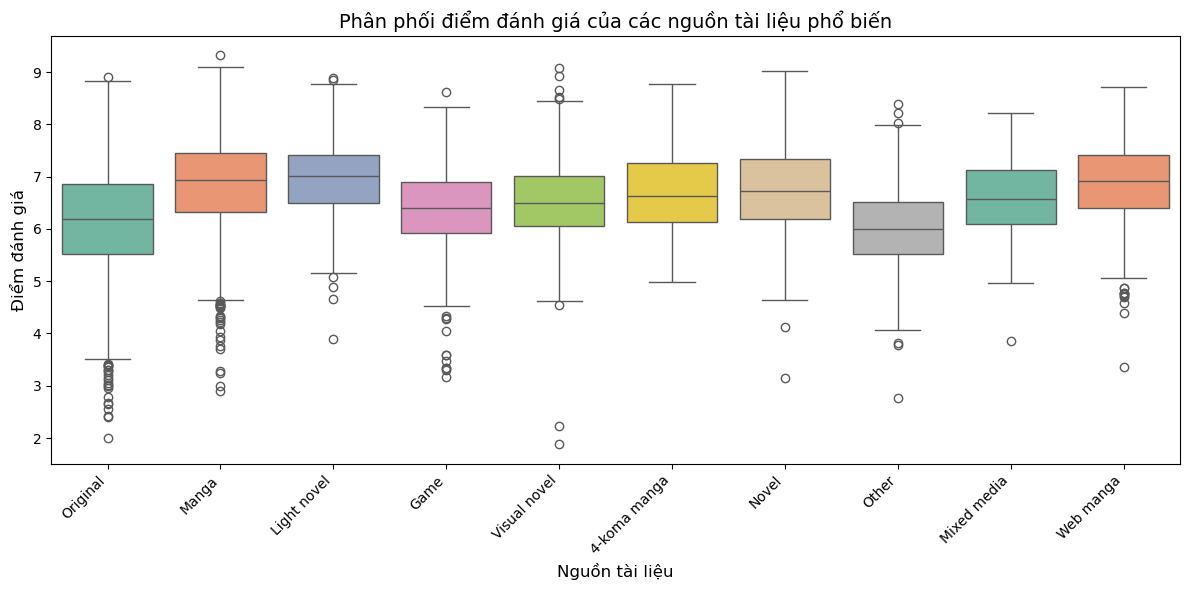

In [50]:
# Lấy top các hãng phim có nhiều bộ phim nhất
source_counts = cleaned_df['Source'].value_counts()
top_source = source_counts.head(10).index
filtered_df = cleaned_df[cleaned_df['Source'].isin(top_source)]

# Vẽ biểu đồ hộp
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Source', y='Score', hue='Source', palette='Set2', dodge=False)

plt.title('Phân phối điểm đánh giá của các nguồn tài liệu phổ biến', fontsize=14)
plt.xlabel('Nguồn tài liệu', fontsize=12)
plt.ylabel('Điểm đánh giá', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Biểu đồ 3: Mối quan hệ giữa số lượng phim, điểm trung bình và số lượt đánh giá.

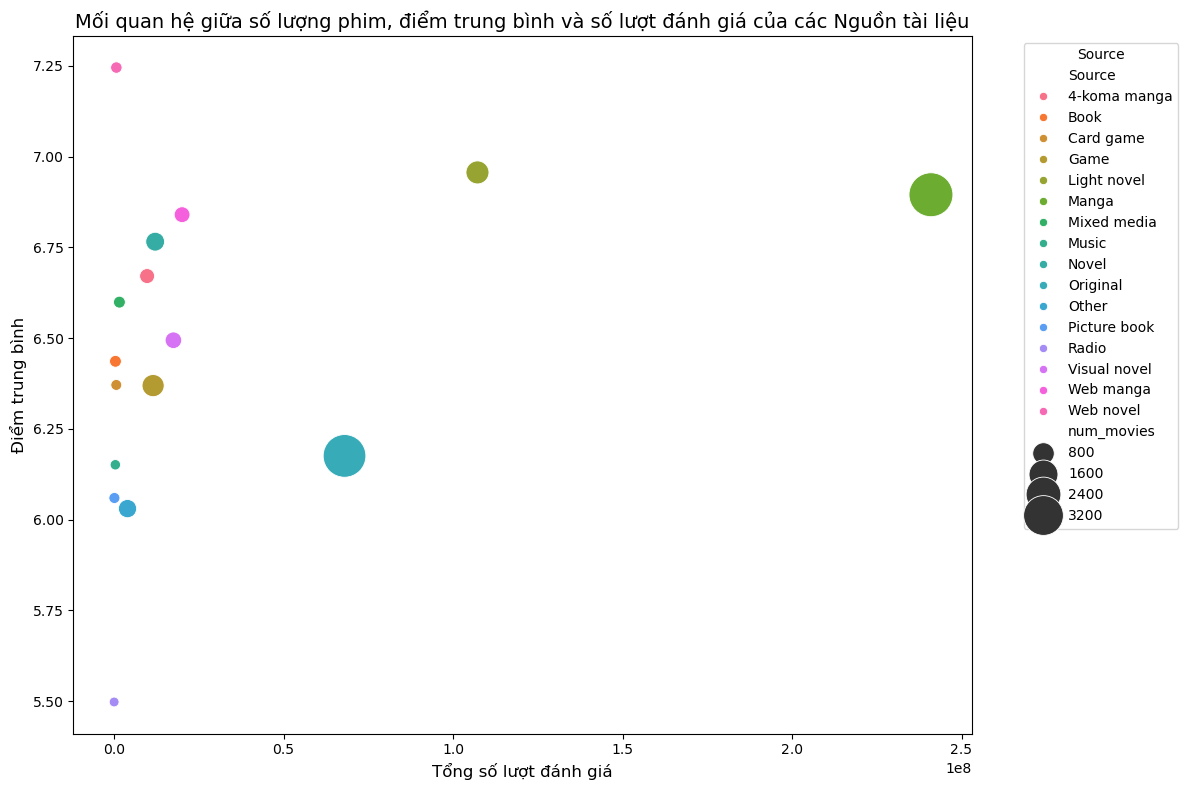

In [51]:
# Tính số lượng phim, điểm trung bình và tổng số lượt đánh giá cho mỗi nguồn
source_stats = cleaned_df.groupby('Source').agg(
    num_movies=('Source', 'size'),          # Số lượng phim
    avg_score=('Score', 'mean'),            # Điểm trung bình
    total_reviews=('Scored By', 'sum')      # Tổng số lượt đánh giá
).reset_index()

# Sử dụng bảng màu husl để có màu bão hòa
n_sources = len(source_stats['Source'].unique())  # Số lượng nguồn
palette = sns.color_palette("husl", n_colors=n_sources)

# Vẽ bubble plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(
    data=source_stats,
    x='total_reviews',
    y='avg_score',
    size='num_movies',          # Kích thước bong bóng là số lượng phim
    sizes=(50, 1000),           # Điều chỉnh kích thước bong bóng
    hue='Source',               # Sử dụng Source để làm màu
    palette=palette,             # Bảng màu
    legend='brief'              # Hiển thị legend
)

# Điều chỉnh tiêu đề và nhãn
plt.title('Mối quan hệ giữa số lượng phim, điểm trung bình và số lượt đánh giá của các Nguồn tài liệu', fontsize=14)
plt.xlabel('Tổng số lượt đánh giá', fontsize=12)
plt.ylabel('Điểm trung bình', fontsize=12)

# Hiển thị legend với tên các nguồn
handles, labels = bubble_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Source', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Tinh chỉnh bố cục
plt.tight_layout()
plt.show()


## Kết luận

- Biểu đồ 1: Top 10 Nguồn tài liệu có điểm đánh giá trung bình cao nhất
  + Quan sát:
    + Biểu đồ cho thấy các nguồn tài liệu như Web novel, Light novel, và Manga nằm trong top đầu với điểm đánh giá trung bình cao nhất. Web novel đứng đầu với điểm trung bình là 7.25 và chênh lệch khá cao so với các Nguồn tài liệu khác, trong khi các Nguồn khác có độ chênh lệch không quá nhiều.
    + Nguồn tài liệu về Manga, Novel cũng xuất hiện khác nhiều với nhiều loại khác nhau cho thấy đây cũng là một xu hướng được nhiều sự đánh giá cao.
  + Ý nghĩa: Những nguồn tài liệu này thường được khai thác tốt, có nội dung chất lượng, phù hợp để chuyển thể thành anime nhận được đánh giá cao.
- Biểu đồ 2: Phân phối điểm đánh giá của các nguồn tài liệu phổ biến
  + Quan sát:
    + Các nguồn tài liệu như Manga, Light novel, và Web manga có phân phối điểm đánh giá tương đối ổn định, tập trung chủ yếu ở mức trung bình đến cao.
    + Các nguồn như Original, Game và Visual novel có sự phân tán lớn hơn, tức là mức độ biến động về chất lượng khi chuyển thể.
  + Ý nghĩa: Một số nguồn tài liệu phổ biến (Manga, Light novel) có chất lượng ổn định hơn, trong khi các nguồn khác có sự dao động rõ rệt hơn.
- Biểu đồ 3: Mối quan hệ giữa số lượng phim, điểm trung bình và số lượt đánh giá của các nguồn tài liệu
  + Quan sát:
    + Những nguồn tài liệu như Manga và Light novel vừa có điểm trung bình cao, vừa có số lượng phim nhiều và thu hút lượng lớn người đánh giá.
    + Những nguồn tài liệu như 4-koman manga dù có điểm đánh giá rất cao nhưng số lượt đánh giá rất ít và cũng rất ít phim, do đó, không phản ánh được chất lượng nhiều.
    + Nguồn tài liệu Picture book cũng có nhiều phim nhưng điểm đánh giá và lượt đánh giá cũng chỉ ở mức trung bình.
    + Các nguồn còn lại có số lượng phim ít hơn, lượt đánh giá và điểm trung bình cũng thấp hơn.
  + Ý nghĩa: Các nguồn phổ biến thường là những nguồn dễ khai thác và phù hợp với thị hiếu khán giả.
- Kết luận: Nguồn tài liệu rõ ràng là một yếu tố quan trọng trong việc tạo nên những bộ phim được đánh giá cao. Những nguồn như Web novel, Manga, và Light novel có chất lượng nội dung tốt và ổn định, góp phần lớn vào sự thành công của anime khi được chuyển thể. Tuy nhiên, không phải tất cả nguồn tài liệu đều đảm bảo kết quả tốt, điều này còn phụ thuộc vào chất lượng sản xuất và cách khai thác nội dung từ nguồn.